In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# This Notebook consists of Data cleaning,preprocessing ,Statistical Analysis of the Data and Understand about the data to find a suitable algorithm for the data 

# **Objective**:

*My aim objective is to Create a Machine learning Model that cab able to detect the fraud by learning the patterns in the data,I have taken the KPIS Key Performance indicators for this Project are Accuracy,Precision,F1 score, Mean Squared Error, Mean absolute error , Recall, and model quality indicators are AUC-ROC (Area Under the Receiver Operating Characteristic Curve),AUC-PR (Area Under the Precision-Recall Curve),Cross-Validation Score:*


In [1]:
#Displaying the columns of the dataset
#first inorder to work on the csv file we need to create a pandas object and then operate on it
import pandas as pd
import numpy as np
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
print(data.columns)
print("\n")
print("---------------------------------------------------------------------------")
print(data.head())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


---------------------------------------------------------------------------
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.08510

In [4]:
#The no of rows and columns in the dataset are
rows = data.shape[0]
columns = data.shape[1]
print("The no of rows & columns in the dataset are",rows,"<-->",columns)

The no of rows & columns in the dataset are 284807 <--> 31


In [8]:
#Datatypes 
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


#  Only Class is the Integer Type and It is the target Variable, Remaining all the features are Float64

# Now its time to do some cleaning of the data it involves analysis and techniques to enhance the dataset # 

In [10]:
#data is the dataframe now its time to check for the null values
print(data.isnull())
print(data.isnull().sum())

        Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     ...  V21    V22    \
0       False  False  False  False  False  False  False  False  False  False  ...  False  False   
1       False  False  False  False  False  False  False  False  False  False  ...  False  False   
2       False  False  False  False  False  False  False  False  False  False  ...  False  False   
3       False  False  False  False  False  False  False  False  False  False  ...  False  False   
4       False  False  False  False  False  False  False  False  False  False  ...  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False  ...  False  False   
284803  False  False  False  False  False  False  False  False  False  False  ...  False  False   
284804  False  False  False  False  False  False  False  False  False  False  ...  False  False   
284805  Fa

# Since there are no null values in the dataset, Now we will check for duplicate entries in the dataset 

In [16]:
data.drop_duplicates(inplace=True)

# Lets do some EDA Exploratory Data Analysis, which helps us to get an idea about the data , how the data spread , what is the average and other things

In [18]:
#describe method of the pandas shows different items of analysis , for each and every column it shows 8 variables
print(data.describe())

       Time           V1             V2             V3             V4             V5             \
count  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613      -0.002966       0.001828   
std     47481.047891       1.948026       1.646703       1.508682       1.414184       1.377008   
min         0.000000     -56.407510     -72.715728     -48.325589      -5.683171    -113.743307   
25%     54204.750000      -0.915951      -0.600321      -0.889682      -0.850134      -0.689830   
50%     84692.500000       0.020384       0.063949       0.179963      -0.022248      -0.053468   
75%    139298.000000       1.316068       0.800283       1.026960       0.739647       0.612218   
max    172792.000000       2.454930      22.057729       9.382558      16.875344      34.801666   

       V6             V7             V8             V9             ...  V21            \
count  283726.00000

1. count: The number of non-null values in the dataset.
2. mean: The average value of the dataset.
3. std: The standard deviation of the dataset, which measures the spread or dispersion of the valuesn from the mea.
4. min: The minimum value in the dataset.
5. 25%: The first quartile (Q1), which represents the 25th percentile of the dataset.
6. 50%: The second quartile (Q2) or median, which represents the 50th percentile of the dataset.
7. 75%: The third quartile (Q3), which represents the 75th percentile of the dataset.
8. max: The maximum value in the dataset.


# Data Imbalance Check

> Plot the class distribution using a bar plot to confirm class imbalance.

<Axes: xlabel='Class', ylabel='count'>

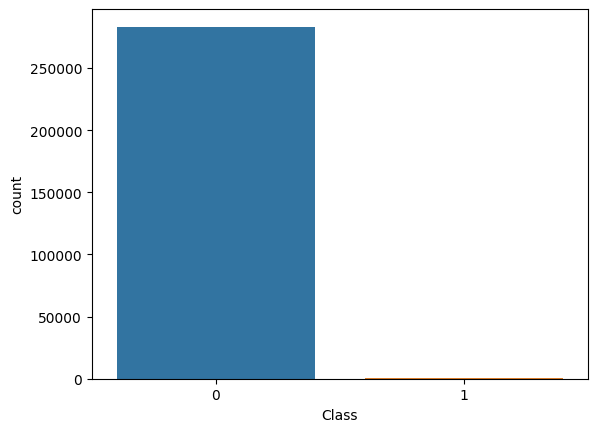

In [20]:
import seaborn as sns
(sns.countplot(x='Class', data=data))

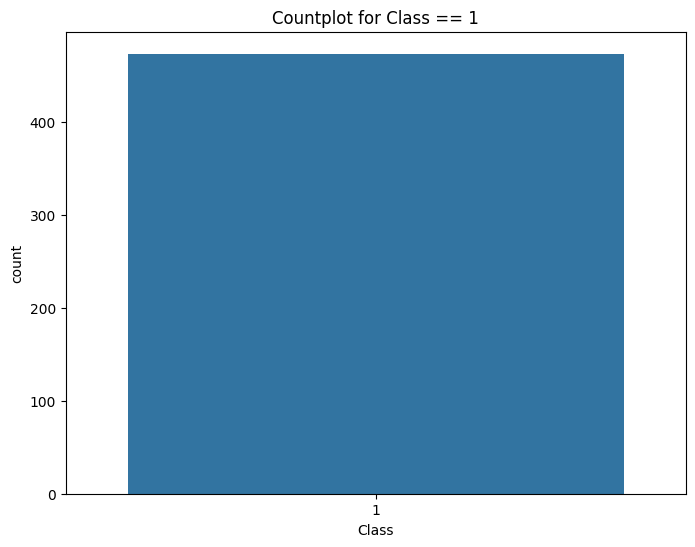

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only rows where Class == 1
data_class_1 = data[data['Class'] == 1]

# Plot the countplot for Class == 1
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data_class_1)
plt.title('Countplot for Class == 1')
plt.show()


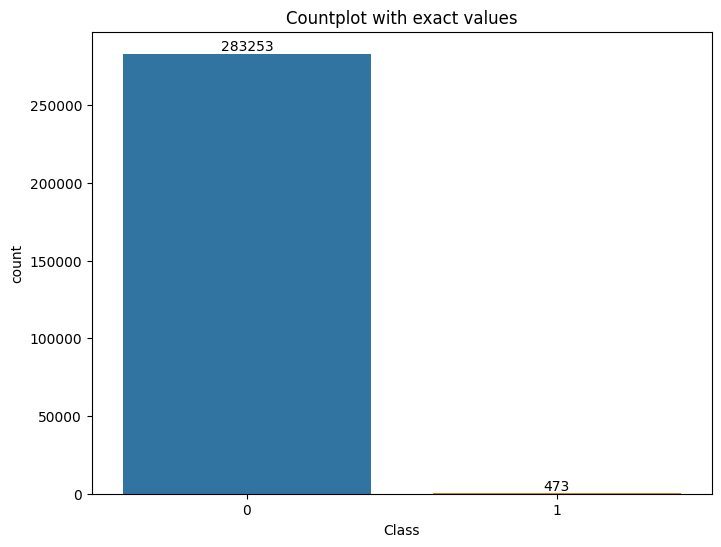

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=data)

# Add the exact value at the top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), str(int(p.get_height())),
             ha='center', va='bottom', size=10, color='black')

plt.title('Countplot with exact values')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


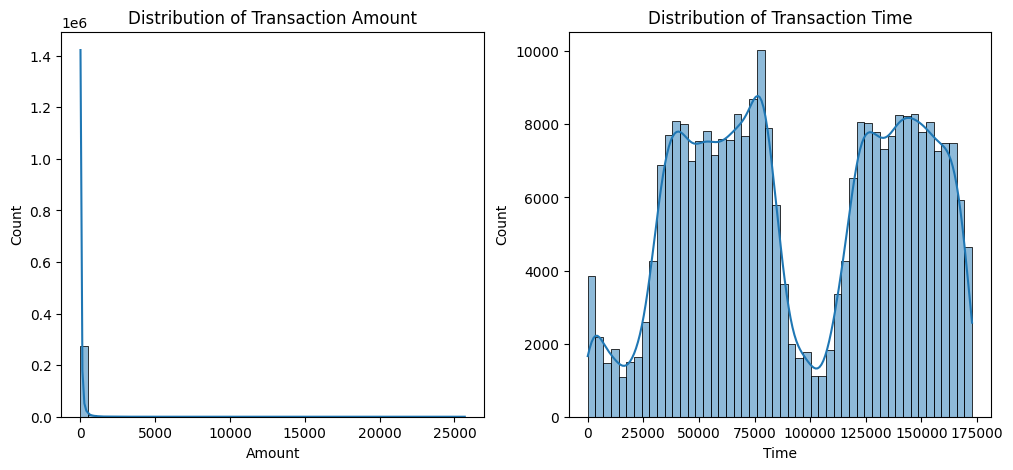

In [24]:
# Distribution of Amount and Time
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #use to create a figure of figures ,with 1 row and 2 cols
sns.histplot(data['Amount'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Transaction Amount')
sns.histplot(data['Time'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Transaction Time')
plt.show()

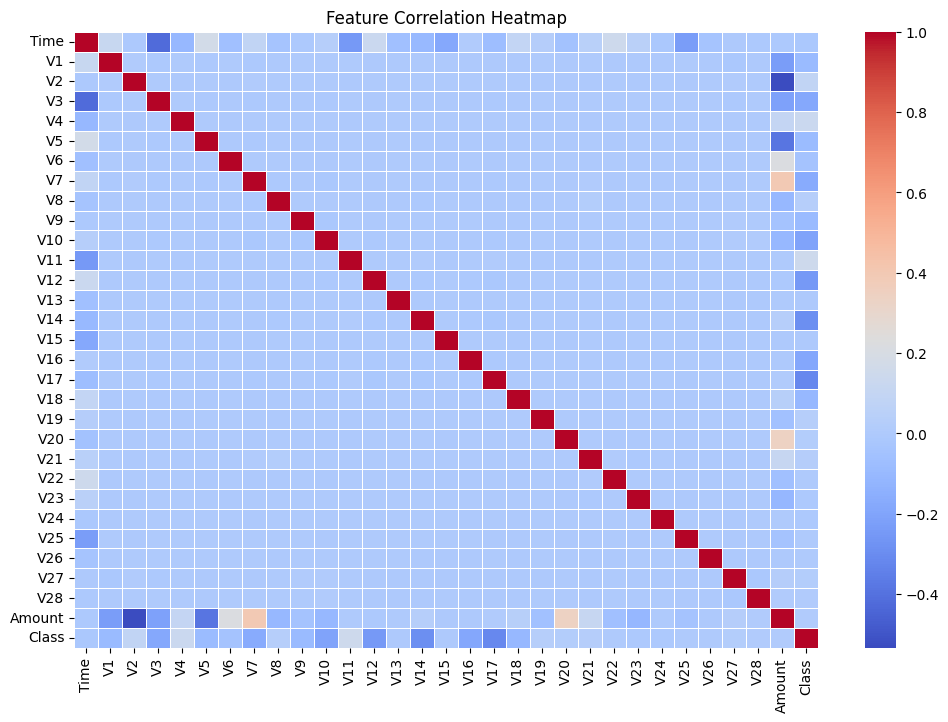

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Now its time to handle the imbalance in the dataset, there some techniques to balance the dataset with correct distribution of the class labels



New Class Distribution After Resampling:
Class
0    283252
1    141626
Name: count, dtype: int64


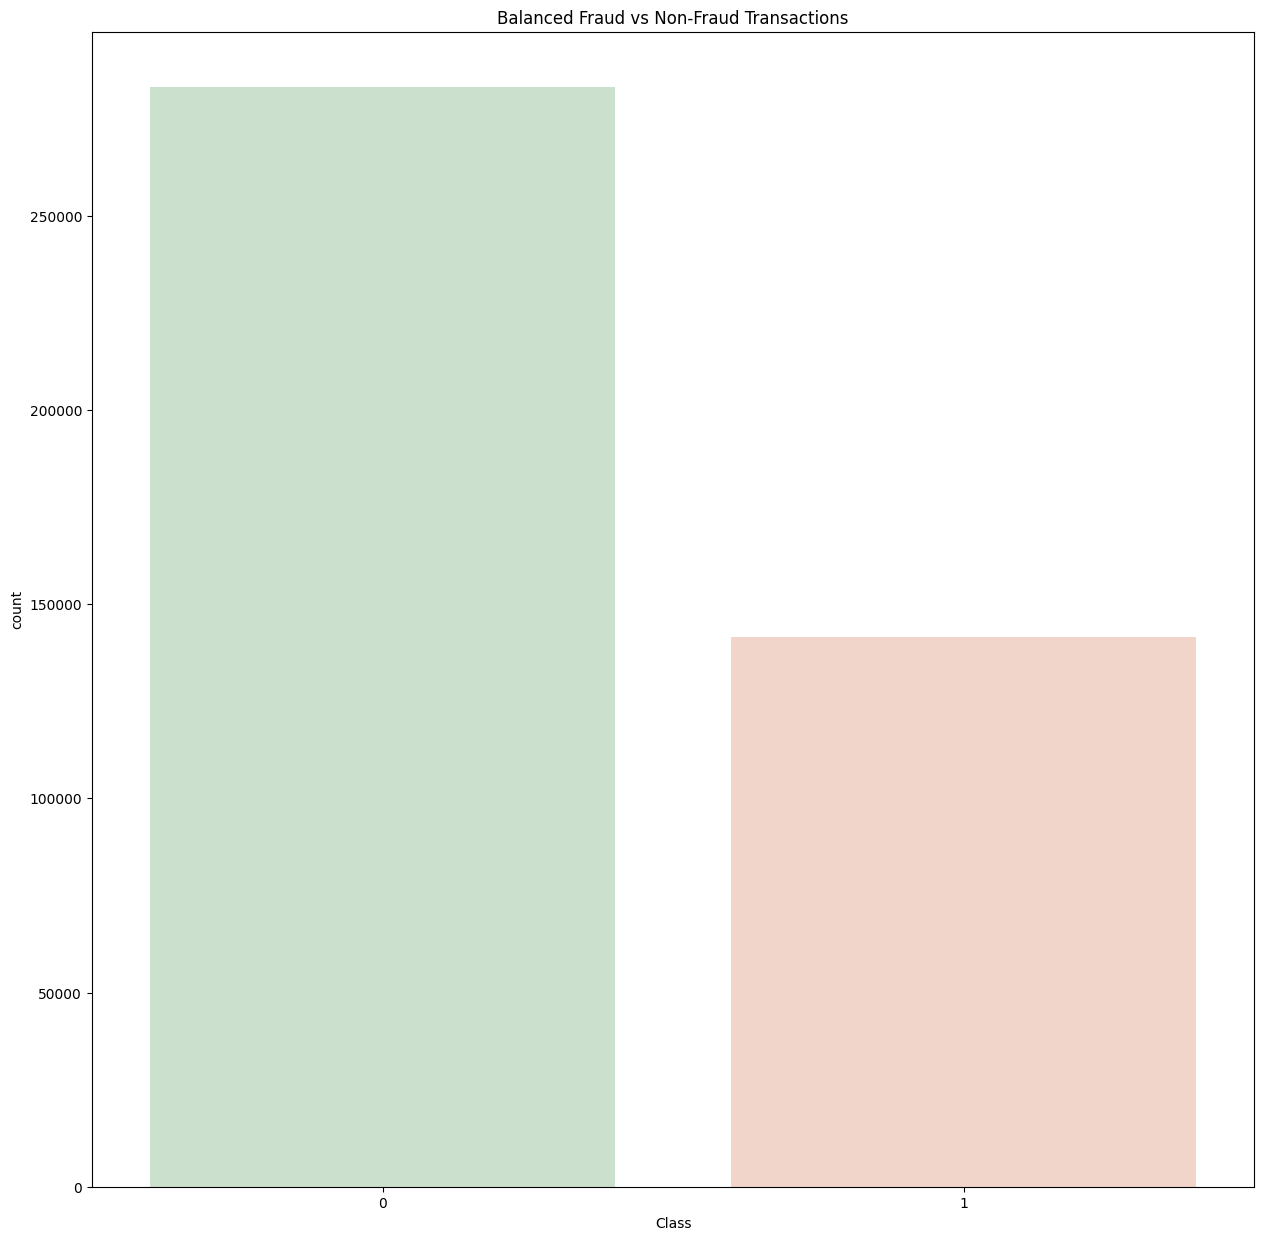

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Handling Class Imbalance
x = data.drop(columns=['Class'])
y = data['Class']
smote = SMOTE(random_state=42,sampling_strategy=0.5) # 2 parameters -sampling strategy,randomstate
under = RandomUnderSampler(random_state=42,sampling_strategy=0.5)
pipe = Pipeline(steps = [('smote',smote),('under',under)]) #an object that holds the steps as key:object
x_resampled,y_resampled=pipe.fit_resample(x,y)
#now create a newly pandas dataframe
data_resampled = pd.DataFrame(x_resampled, columns=x.columns)
data_resampled['Class'] = y_resampled
 #Check new class distribution
print("\nNew Class Distribution After Resampling:")
print(data_resampled['Class'].value_counts())

# Plot new class distribution
plt.figure(figsize=(15,15))
palette=['#C9E4CA', '#F7D2C4', '#87CEEB']
sns.countplot(x='Class',data=data_resampled,palette=palette)
plt.title('Balanced Fraud vs Non-Fraud Transactions')
plt.show()



New Class Distribution After Resampling:
Class
0    283252
1    283252
Name: count, dtype: int64


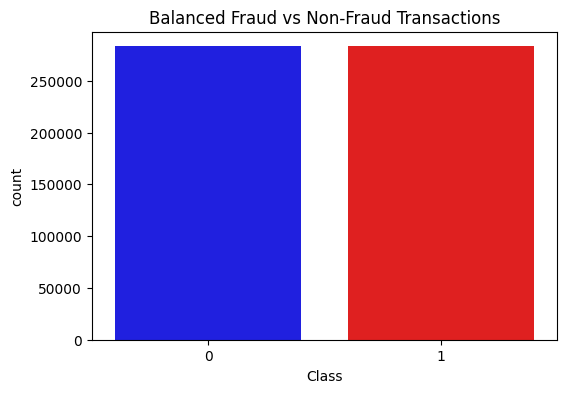

In [44]:
x = data_resampled.drop(columns=['Class'])
y = data_resampled['Class']
#  apply undersampling to reduce majority class significantly
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Reduce majority class more
X_under, y_under = under.fit_resample(x, y)

# Then apply SMOTE to generate more samples for minority class
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Increase minority class to equal majority
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Convert back to DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Class'] = y_resampled

# Check new class distribution
print("\nNew Class Distribution After Resampling:")
print(data_resampled['Class'].value_counts())

# Plot new class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data_resampled, palette=['blue', 'red'])
plt.title('Balanced Fraud vs Non-Fraud Transactions')
plt.show()


# Now both the target variable values has equal distribution

In [47]:
#Now print the new resampled dataset dimensions
data = data_resampled
print(data.shape[0],"The count of the rows")
print((data['Class']==1).count())
print((data['Class']==0).count())

566504 The count of the rows
566504
566504


# Now model creation section

In [48]:
#Import The necessaray libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Make the separation of featuers from the target

In [49]:
x = data.drop(columns=['Class'])
y= data['Class']

In [50]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


📌 Training: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9793
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56651
           1       0.99      0.97      0.98     56650

    accuracy                           0.98    113301
   macro avg       0.98      0.98      0.98    113301
weighted avg       0.98      0.98      0.98    113301

Confusion Matrix:
 [[56156   495]
 [ 1854 54796]]


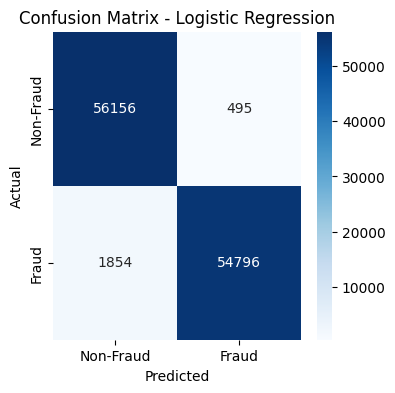


📌 Training: Random Forest
Accuracy: 0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56650

    accuracy                           1.00    113301
   macro avg       1.00      1.00      1.00    113301
weighted avg       1.00      1.00      1.00    113301

Confusion Matrix:
 [[56641    10]
 [    1 56649]]


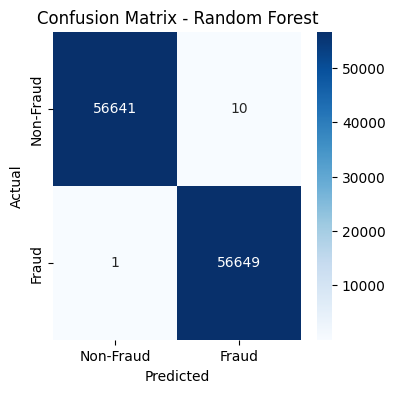


📌 Training: XGBoost
Accuracy: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56650

    accuracy                           1.00    113301
   macro avg       1.00      1.00      1.00    113301
weighted avg       1.00      1.00      1.00    113301

Confusion Matrix:
 [[56631    20]
 [    0 56650]]


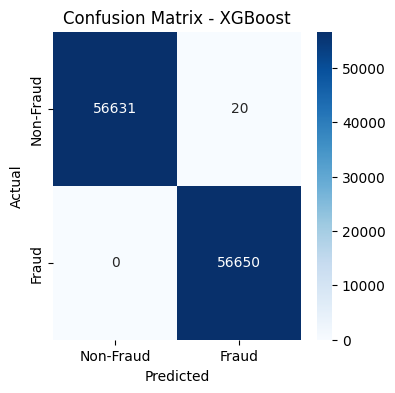


📌 Training: Support Vector Machine
Accuracy: 0.9966
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56650

    accuracy                           1.00    113301
   macro avg       1.00      1.00      1.00    113301
weighted avg       1.00      1.00      1.00    113301

Confusion Matrix:
 [[56527   124]
 [  258 56392]]


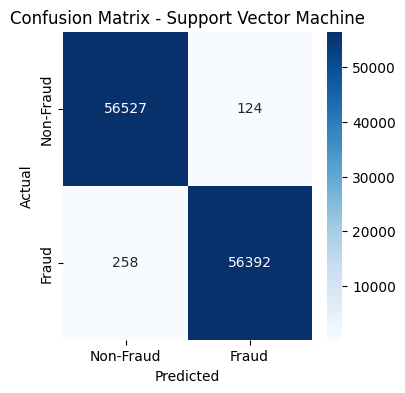


📌 Training: K-Nearest Neighbors
Accuracy: 0.9992
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56650

    accuracy                           1.00    113301
   macro avg       1.00      1.00      1.00    113301
weighted avg       1.00      1.00      1.00    113301

Confusion Matrix:
 [[56562    89]
 [    0 56650]]


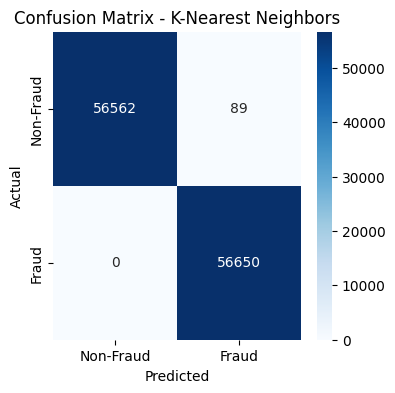


📌 Training: Naïve Bayes
Accuracy: 0.9239
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     56651
           1       0.97      0.87      0.92     56650

    accuracy                           0.92    113301
   macro avg       0.93      0.92      0.92    113301
weighted avg       0.93      0.92      0.92    113301

Confusion Matrix:
 [[55363  1288]
 [ 7329 49321]]


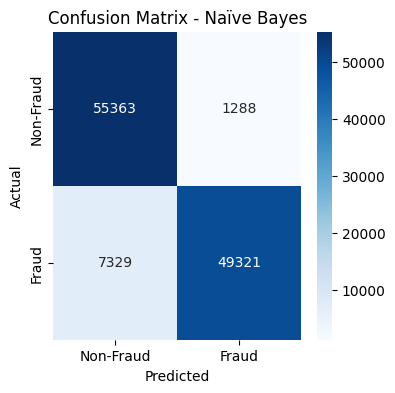

In [53]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

# Train and Evaluate models
for name, model in models.items():
    print(f"\n📌 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [54]:
import joblib

for name, model in models.items():
    filename = f"{name.replace(' ', '_')}.pkl"
    joblib.dump(model, filename)  # Saves model as a .pkl file
    print(f"{name} model saved as {filename}")

Logistic Regression model saved as Logistic_Regression.pkl
Random Forest model saved as Random_Forest.pkl
XGBoost model saved as XGBoost.pkl
Support Vector Machine model saved as Support_Vector_Machine.pkl
K-Nearest Neighbors model saved as K-Nearest_Neighbors.pkl
Naïve Bayes model saved as Naïve_Bayes.pkl
